In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pkg.science.rooftops.damage import classifier

Using TensorFlow backend.


In [3]:
from keras import layers
from keras import models
from keras.applications import ResNet50

conv_base = ResNet50(weights = 'imagenet', include_top = False, input_shape=(512, 512, 3))

from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import TensorBoard, ModelCheckpoint

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'res5c_branch2a':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 25,686,148
Trainable params: 6,564,100
Non-trainable params: 19,122,048
_________________________________________________________________


In [4]:
model.load_weights('/home/skhatter/log_tfb/resnet_30/weights-e026.hdf5')


opening 7eb09177-2a52-441b-822e-b1fcb230aae8.jpg ... predicting ... reconstructing ...

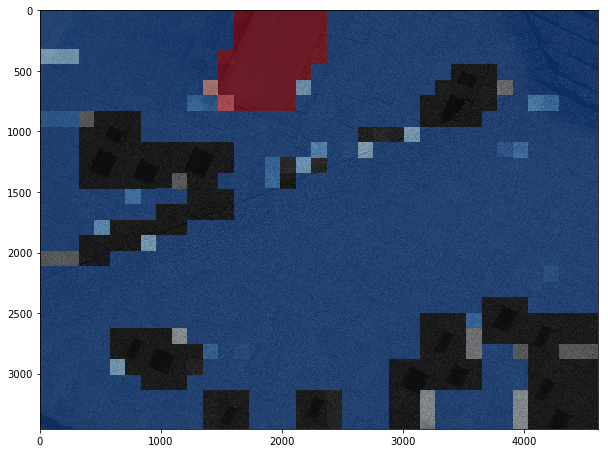

 
opening 9a468270-8f3e-4fb3-8a96-24f00e5a32c2.jpg ... predicting ... reconstructing ...

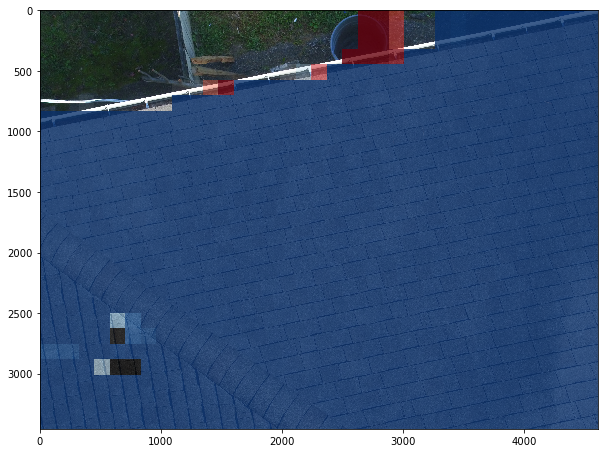

 
opening 49de34a5-7be5-468e-a371-a76daf470fae.jpg ... predicting ... reconstructing ...

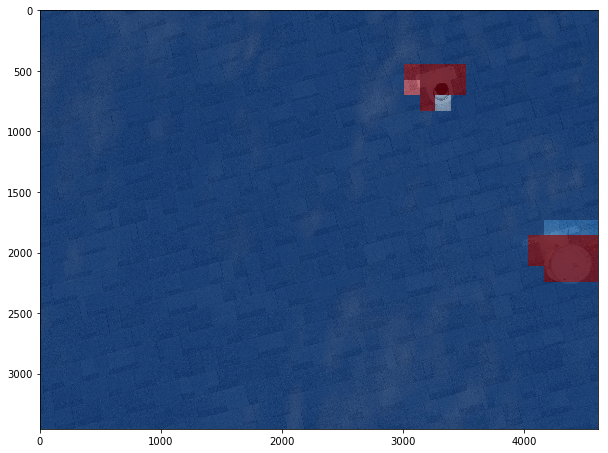

 
opening 37beffb1-8fb0-46ce-8543-d224558f92b9.jpg ... predicting ... reconstructing ...

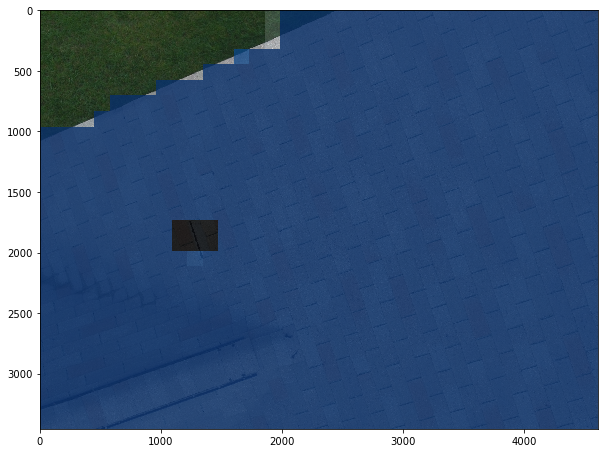

 
opening 4a368fd8-06eb-4655-a6a4-f5dcbeb8e078.jpg ... predicting ... reconstructing ...

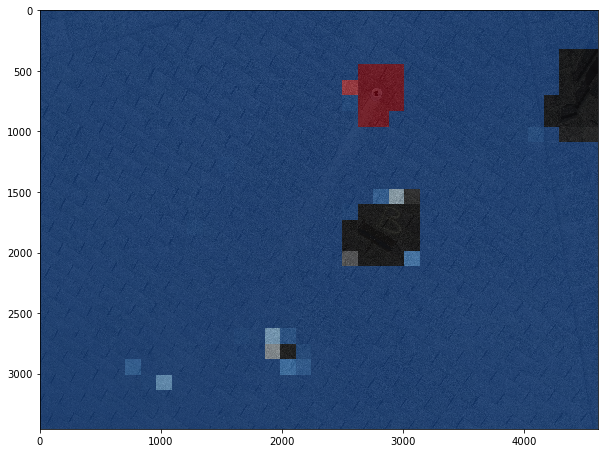

 
opening 926e185b-76e8-4230-85cb-290663f0fa1e.jpg ... predicting ... reconstructing ...

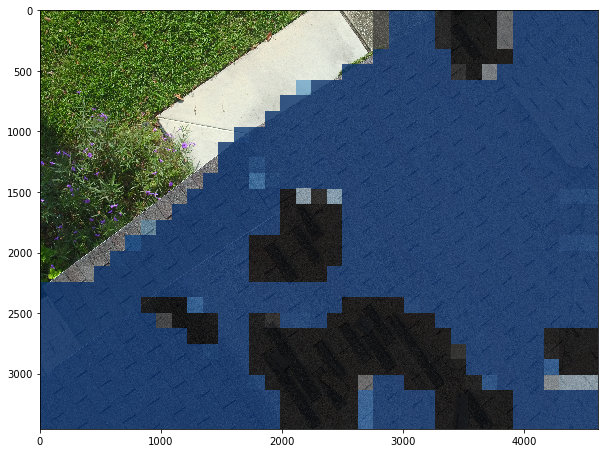

 
opening 013321ed-fb7e-4422-bb3d-5976db56506b.jpg ... predicting ... reconstructing ...

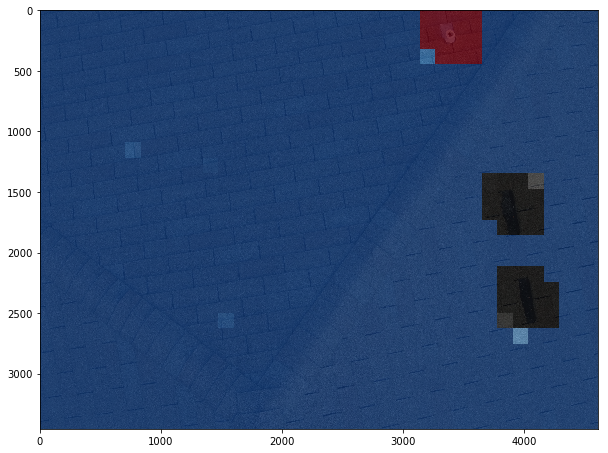

 
opening 41abdc98-8340-475d-9ec9-f874a6f71453.jpg ... predicting ... reconstructing ...

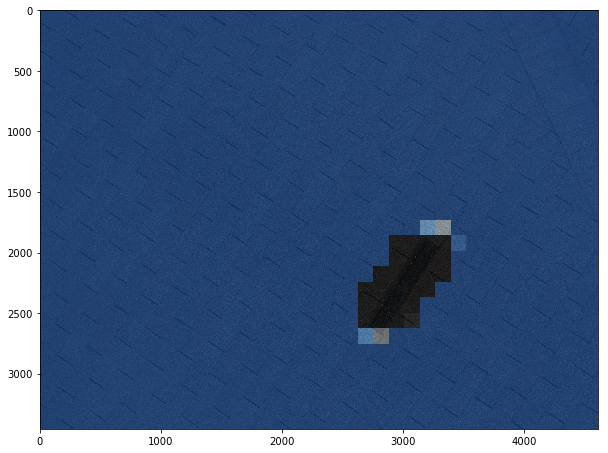

 
opening 4edb92e9-14c3-464f-bd2a-ad47aa9ffa63.jpg ... predicting ... reconstructing ...

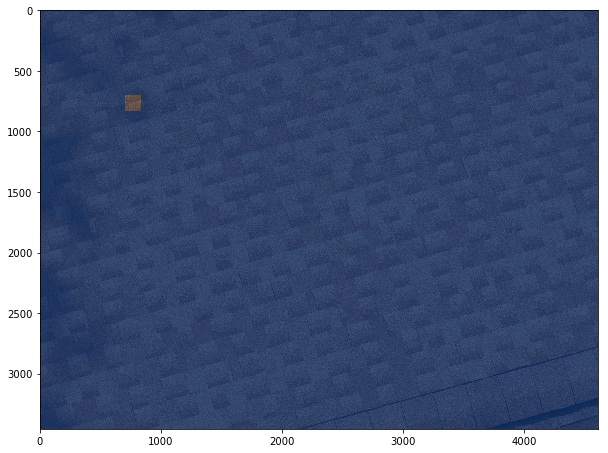

 
opening c5c819ac-20f8-45b6-9af8-e5f3ce72e0f7.jpg ... predicting ... reconstructing ...

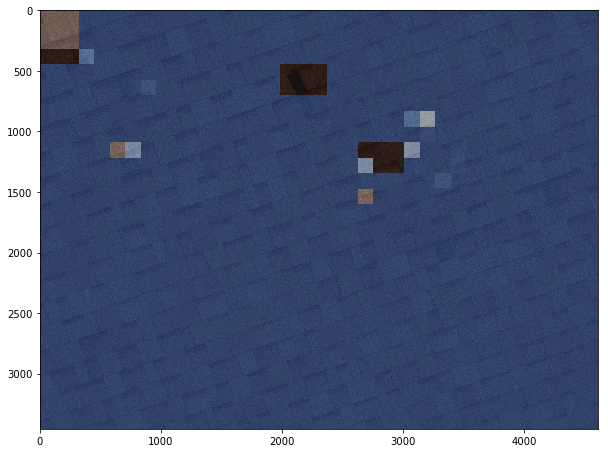

In [5]:
classifier.compare_to_test_set(model, '/home/skhatter/rooftop_damage_data/test')